### Proyecto de Machine Learning

👀Verifica que las librerias esten instaladas 

En este caso se realizará un modelo para predecir la media de precios en las viviendas de los diferentes municipos de Londres, Reino Unido.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## <span style="color:green">1. Descargar los datos</span>

Las bases de datos para este proyecto se puede encontrar en este enlace: https://www.kaggle.com/justinas/housing-in-london

También se pueden consultar todas las bases de datos de este curso en GitHub: https://github.com/ANFESADI15/A2/blob/main/C2/archive/housing_in_london_yearly_variables.csv

- housing_in_london_yearly_variables.csv, con los datos que necesitamos para hacer la regresión.
- London_Borough_Excluding_MHW.shp, con los datos que necesitamos para graficar Londres.
- Capitulo_2/housing_in_london_monthly_variables.csv, con los datos de la media salarial

In [2]:
## Definimos una función para extraer datos.
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ANFESADI15/A2/main/C2/"
#Complementos con la dirección especifica de la base de datos que queremos.
LONDON_SALARY = "MachineLearning_Data-main/MachineLearning_Data-main/Capitulo_2/housing_in_london_yearly_variables.csv"
LONDON_HOUSING = "MachineLearning_Data-main/MachineLearning_Data-main/Capitulo_2/housing_in_london_monthly_variables.csv"
LONDON_MAP = os.path.abspath("") + "\map\London_Borough_Excluding_MHW.shp"


def extraer_datos(root,database):
    csv_path = root + database
    return pd.read_csv(csv_path)

## <span style="color:green">2. Visualizacion de datos</span>

In [3]:
## Juntamos nuestra base de datos de la media salarial, con la de datos de Londres.

df1 = extraer_datos(DOWNLOAD_ROOT, LONDON_HOUSING)
df2 = extraer_datos(DOWNLOAD_ROOT, LONDON_SALARY)
df2.head()



,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [4]:
df2 = df2.filter(items=["median_salary","area","date"])
df2.head

<bound method NDFrame.head of       median_salary                  area        date
0           33020.0        city of london  1999-12-01
1           21480.0  barking and dagenham  1999-12-01
2           19568.0                barnet  1999-12-01
3           18621.0                bexley  1999-12-01
4           18532.0                 brent  1999-12-01
...             ...                   ...         ...
1066        30446.0         great britain  2019-12-01
1067        30500.0     england and wales  2019-12-01
1068        27434.0      northern ireland  2019-12-01
1069        30000.0              scotland  2019-12-01
1070        27500.0                 wales  2019-12-01

[1071 rows x 3 columns]>

In [5]:
data = pd.merge(df2,df1)
data.head()

,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag
0,33020.0,city of london,1999-12-01,169309,E09000001,97.0,NaN,1
1,21480.0,barking and dagenham,1999-12-01,68812,E09000002,267.0,NaN,1
2,19568.0,barnet,1999-12-01,149510,E09000003,619.0,NaN,1
3,18621.0,bexley,1999-12-01,93905,E09000004,460.0,NaN,1
4,18532.0,brent,1999-12-01,123398,E09000005,395.0,NaN,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_salary  881 non-null    float64
 1   area           903 non-null    object 
 2   date           903 non-null    object 
 3   average_price  903 non-null    int64  
 4   code           903 non-null    object 
 5   houses_sold    860 non-null    float64
 6   no_of_crimes   617 non-null    float64
 7   borough_flag   903 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 63.5+ KB


In [7]:
# Una forma muy común para saber que tipo de datos contiene alguna variable de tipo objeto, es contar sus valores, ejemplo:
data["area"].value_counts()

city of london            21
westminster               21
newham                    21
redbridge                 21
richmond upon thames      21
southwark                 21
sutton                    21
tower hamlets             21
waltham forest            21
wandsworth                21
north east                21
lewisham                  21
north west                21
east midlands             21
west midlands             21
london                    21
south east                21
south west                21
inner london              21
outer london              21
merton                    21
lambeth                   21
barking and dagenham      21
greenwich                 21
barnet                    21
bexley                    21
brent                     21
bromley                   21
camden                    21
croydon                   21
ealing                    21
enfield                   21
hackney                   21
kingston upon thames      21
hammersmith an

In [8]:
data.describe()

,median_salary,average_price,houses_sold,no_of_crimes,borough_flag
count,881.000000,9.030000e+02,860.000000,617.000000,903.000000
mean,28789.284904,3.099169e+05,3853.289535,2038.090762,0.767442
std,6508.321987,1.875274e+05,12917.661579,879.517578,0.422697
min,15684.000000,4.829800e+04,6.000000,0.000000,0.000000
25%,24582.000000,1.892870e+05,246.000000,1542.000000,1.000000
50%,28284.000000,2.608930e+05,351.000000,2008.000000,1.000000
75%,31589.000000,3.875970e+05,626.000000,2402.000000,1.000000
max,61636.000000,1.364185e+06,119458.000000,7461.000000,1.000000


La tabla anterior trae muchos 0 debidoa que python trae notacion cientifica, por lo cual haremos un arreglo

In [9]:
# esto nos mostrara solo dos decimales
pd.options.display.float_format = "{:,.2f}".format
data.describe()

,median_salary,average_price,houses_sold,no_of_crimes,borough_flag
count,881.00,903.00,860.00,617.00,903.00
mean,"28,789.28","309,916.87","3,853.29","2,038.09",0.77
std,"6,508.32","187,527.43","12,917.66",879.52,0.42
min,"15,684.00","48,298.00",6.00,0.00,0.00
25%,"24,582.00","189,287.00",246.00,"1,542.00",1.00
50%,"28,284.00","260,893.00",351.00,"2,008.00",1.00
75%,"31,589.00","387,597.00",626.00,"2,402.00",1.00
max,"61,636.00","1,364,185.00","119,458.00","7,461.00",1.00


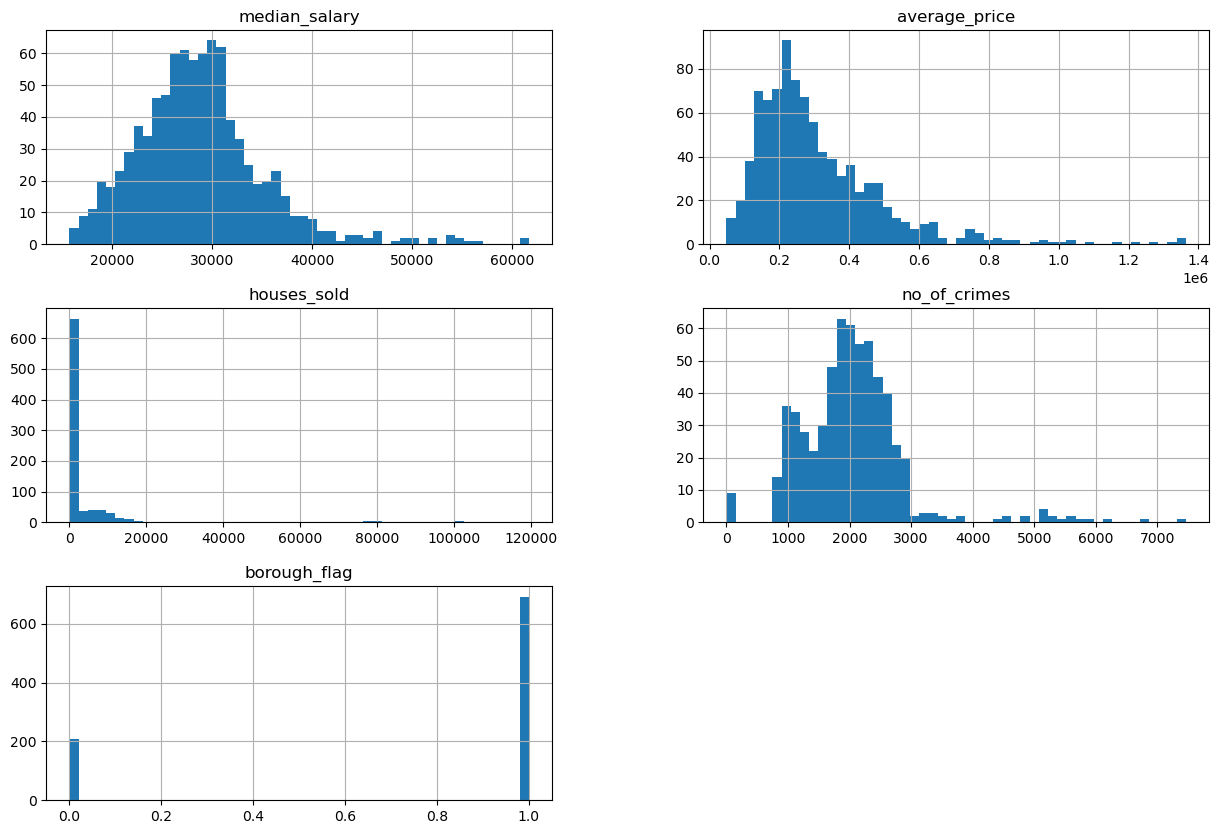

In [13]:
# histogramas
%matplotlib inline
data.hist(bins = 50, figsize=(15,10))
plt.show()

In [ ]:
# Modificaciones esteticas de los hsistohramas